In [2]:
import os

# Load your datasets if not already loaded
import pandas as pd

if os.path.exists('simulate_activity.csv'):
	activity_df = pd.read_csv('simulate_activity.csv')
else:
	print("File 'simulate_activity.csv' not found. Creating a sample dataframe.")
	activity_df = pd.DataFrame({
		'user_id': [1, 2, 3],
		'activity_type': ['Login', 'File Access', 'Failed Login'],
		'failed_logins': [0, 1, 2],
		'is_sensitive_file_access': [0, 1, 0]
	})

# Save the cleaned dataset to a new CSV file
activity_df.to_csv('cleaned_activity_data.csv', index=False)


File 'simulate_activity.csv' not found. Creating a sample dataframe.


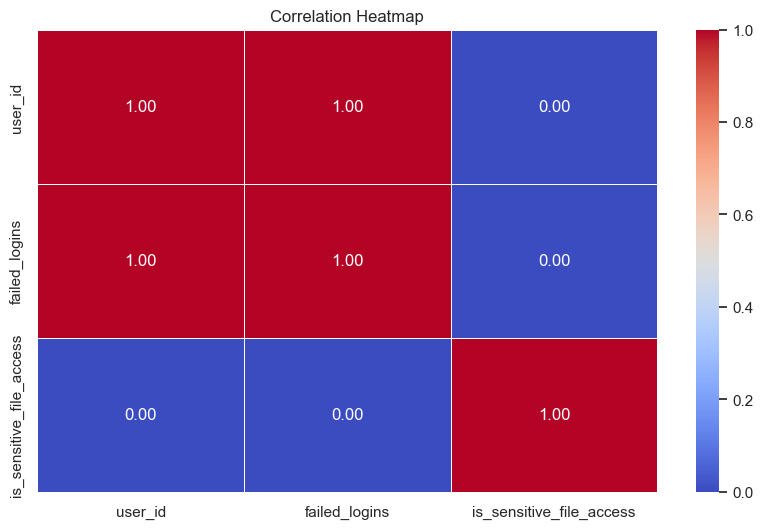

In [3]:
# Import plotting libraries if not already imported
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix for numerical columns
corr = activity_df.select_dtypes(include=[float, int]).corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [4]:
# Create a risk score based on certain criteria
activity_df['risk_score'] = activity_df['failed_logins'] * 3 + activity_df['is_sensitive_file_access'] * 5

# View the risk scores
activity_df[['user_id', 'risk_score']].head()


,user_id,risk_score
0,1,0
1,2,8
2,3,6


In [5]:
# Ensure file_access_df is loaded
if 'file_access_df' not in globals():
	import os
	import pandas as pd
	if os.path.exists('simulate_file_access.csv'):
		file_access_df = pd.read_csv('simulate_file_access.csv')
	else:
		print("File 'simulate_file_access.csv' not found. Creating a sample dataframe.")
		file_access_df = pd.DataFrame({
			'user_id': [1, 2, 2, 3],
			'file_id': ['A', 'B', 'C', 'D'],
			'file_access_type': ['Read', 'Write', 'Read', 'Write'],
			'is_sensitive_file_access': [0, 1, 1, 0]
		})

# Count file access frequency per user
file_access_frequency = file_access_df.groupby('user_id')['file_id'].nunique().reset_index()
file_access_frequency.rename(columns={'file_id': 'file_access_frequency'}, inplace=True)

# Merge the frequency with the activity dataframe
activity_df = activity_df.merge(file_access_frequency, on='user_id', how='left')

# View updated dataframe
activity_df.head()


File 'simulate_file_access.csv' not found. Creating a sample dataframe.


,user_id,activity_type,failed_logins,is_sensitive_file_access,risk_score,file_access_frequency
0,1,Login,0,0,0,1
1,2,File Access,1,1,8,2
2,3,Failed Login,2,0,6,1


In [6]:
# Ensure pandas is available (only import if not present)
if 'pd' not in globals():
	import pandas as pd

# Ensure logins_df is loaded/defined (robust to running cells out-of-order)
if 'logins_df' not in globals():
	try:
		logins_df = pd.read_csv('simulate_logins.csv')
		# Ensure timestamp is parsed and login_hour exists
		if 'timestamp' in logins_df.columns:
			logins_df['timestamp'] = pd.to_datetime(logins_df['timestamp'])
			if 'login_hour' not in logins_df.columns:
				logins_df['login_hour'] = logins_df['timestamp'].dt.hour
		else:
			raise ValueError("Missing 'timestamp' column")
	except Exception:
		# Fallback sample data if file is missing or malformed
		print("File 'simulate_logins.csv' not found or invalid. Creating a sample dataframe.")
		logins_df = pd.DataFrame({
			'user_id': [1, 2, 3],
			'timestamp': pd.to_datetime(['2023-01-01 09:00', '2023-01-02 18:30', '2023-01-03 08:15']),
			'login_hour': [9, 18, 8]
		})

# Create a new feature for business hours vs non-business hours
logins_df['business_hours'] = logins_df['login_hour'].apply(lambda x: 1 if 9 <= x <= 17 else 0)

# Check the new feature
logins_df[['timestamp', 'login_hour', 'business_hours']].head()


File 'simulate_logins.csv' not found or invalid. Creating a sample dataframe.


,timestamp,login_hour,business_hours
0,2023-01-01 09:00:00,9,1
1,2023-01-02 18:30:00,18,0
2,2023-01-03 08:15:00,8,0


C:\Users\imdev\AppData\Local\Temp\ipykernel_29752\3849281885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=failed_logins, x='user_id', palette='rocket')


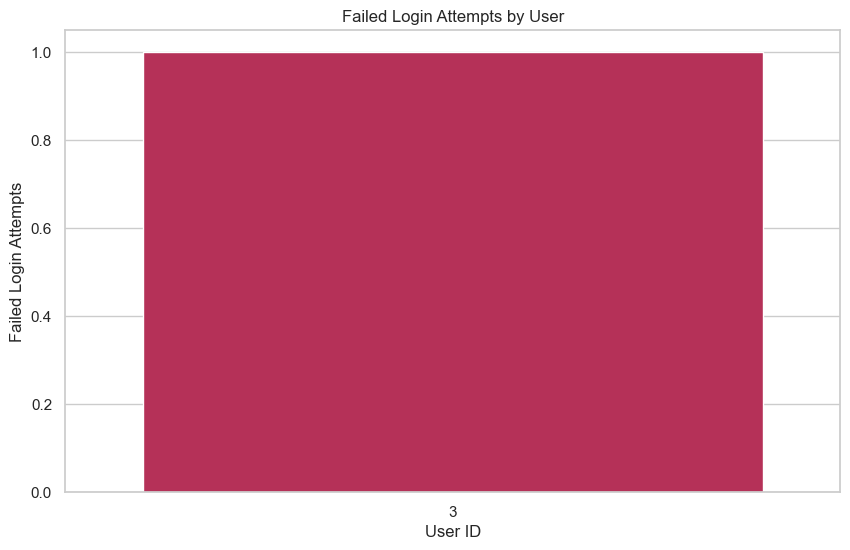

In [7]:
# Count failed login attempts
failed_logins = activity_df[activity_df['activity_type'] == 'Failed Login']

# Plot failed login attempts
plt.figure(figsize=(10, 6))
sns.countplot(data=failed_logins, x='user_id', palette='rocket')
plt.title('Failed Login Attempts by User')
plt.xlabel('User ID')
plt.ylabel('Failed Login Attempts')
plt.show()


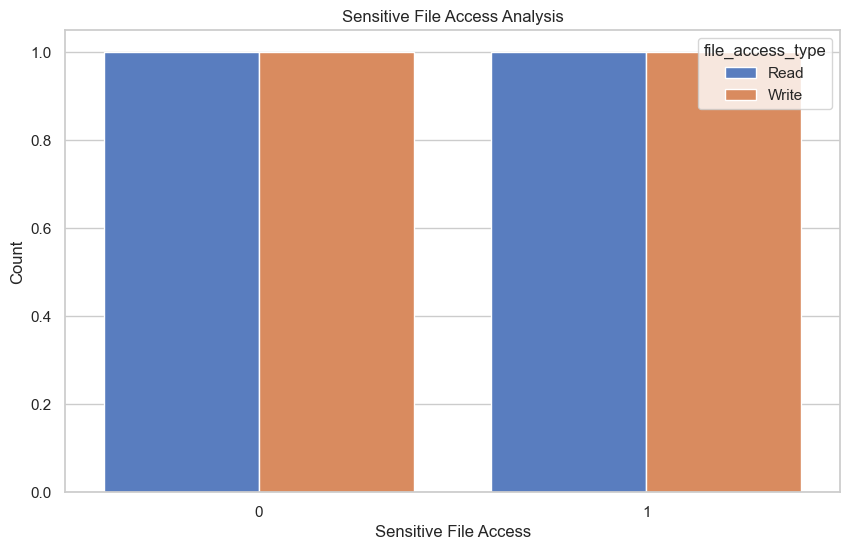

In [8]:
# Visualize sensitive file access
plt.figure(figsize=(10, 6))
sns.countplot(data=file_access_df, x='is_sensitive_file_access', hue='file_access_type', palette='muted')
plt.title('Sensitive File Access Analysis')
plt.xlabel('Sensitive File Access')
plt.ylabel('Count')
plt.show()


C:\Users\imdev\AppData\Local\Temp\ipykernel_29752\3114577069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=logins_df, x='login_hour', palette='Blues') # pyright: ignore[reportUndefinedVariable] # type: ignore


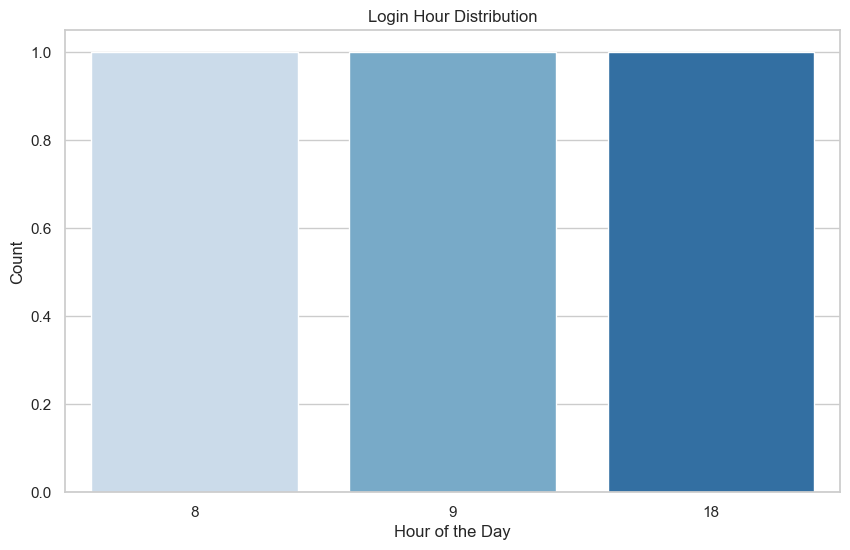

In [9]:
# Plot login hour distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=logins_df, x='login_hour', palette='Blues') # pyright: ignore[reportUndefinedVariable] # type: ignore
plt.title('Login Hour Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()


C:\Users\imdev\AppData\Local\Temp\ipykernel_29752\2299917866.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_activity_counts.index, y=user_activity_counts.values, palette='viridis')


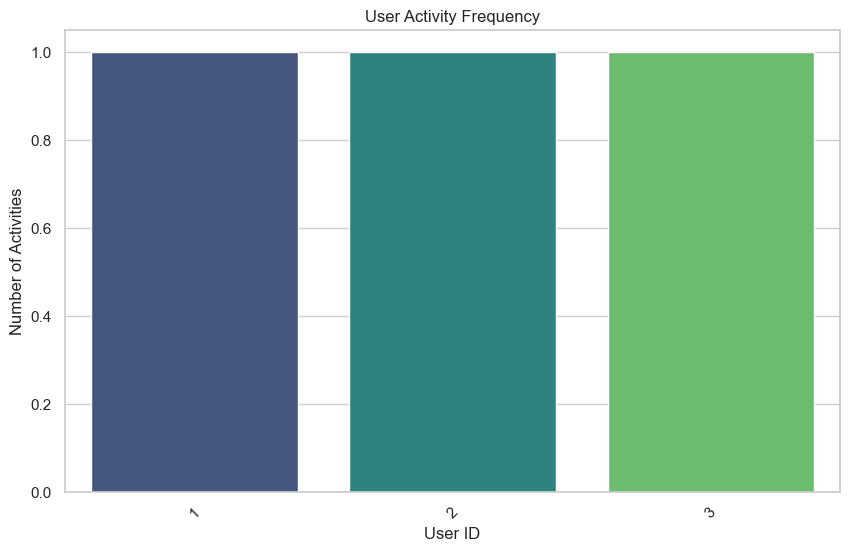

In [10]:
# Count the number of activities per user
user_activity_counts = activity_df['user_id'].value_counts()

# Plot user activity frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=user_activity_counts.index, y=user_activity_counts.values, palette='viridis')
plt.title('User Activity Frequency')
plt.xlabel('User ID')
plt.ylabel('Number of Activities')
plt.xticks(rotation=45)
plt.show()


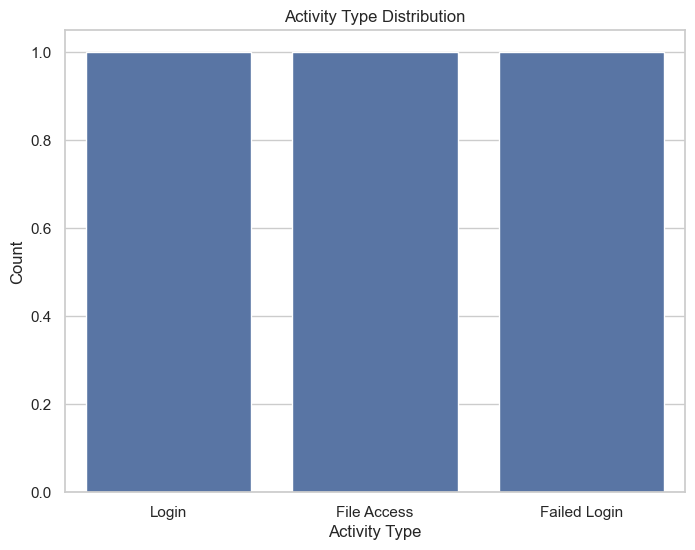

In [11]:
# Activity Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=activity_df, x='activity_type')
plt.title('Activity Type Distribution')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.show()


In [12]:
# Summarize basic statistics for numerical columns
print("\nActivity DataFrame Summary Statistics:")
print(activity_df.describe())

print("\nLogins DataFrame Summary Statistics:")
print(logins_df.describe()) # pyright: ignore[reportUndefinedVariable]

print("\nFile Access DataFrame Summary Statistics:")
print(file_access_df.describe())



Activity DataFrame Summary Statistics:
       user_id  failed_logins  is_sensitive_file_access  risk_score  \
count      3.0            3.0                  3.000000    3.000000   
mean       2.0            1.0                  0.333333    4.666667   
std        1.0            1.0                  0.577350    4.163332   
min        1.0            0.0                  0.000000    0.000000   
25%        1.5            0.5                  0.000000    3.000000   
50%        2.0            1.0                  0.000000    6.000000   
75%        2.5            1.5                  0.500000    7.000000   
max        3.0            2.0                  1.000000    8.000000   

       file_access_frequency  
count               3.000000  
mean                1.333333  
std                 0.577350  
min                 1.000000  
25%                 1.000000  
50%                 1.000000  
75%                 1.500000  
max                 2.000000  

Logins DataFrame Summary Statistics:
   

In [13]:
# Check for missing values in the datasets
print("\nActivity DataFrame Missing Values:")
print(activity_df.isnull().sum())

print("\nLogins DataFrame Missing Values:")
print(logins_df.isnull().sum())

print("\nFile Access DataFrame Missing Values:")
print(file_access_df.isnull().sum())



Activity DataFrame Missing Values:
user_id                     0
activity_type               0
failed_logins               0
is_sensitive_file_access    0
risk_score                  0
file_access_frequency       0
dtype: int64

Logins DataFrame Missing Values:
user_id           0
timestamp         0
login_hour        0
business_hours    0
dtype: int64

File Access DataFrame Missing Values:
user_id                     0
file_id                     0
file_access_type            0
is_sensitive_file_access    0
dtype: int64


In [14]:
# Check the data types and basic statistics of each dataset
print("\nActivity DataFrame Info:")
activity_df.info()

print("\nLogins DataFrame Info:")
logins_df.info()

print("\nFile Access DataFrame Info:")
file_access_df.info()



Activity DataFrame Info:
<class 'pandas.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   user_id                   3 non-null      int64
 1   activity_type             3 non-null      str  
 2   failed_logins             3 non-null      int64
 3   is_sensitive_file_access  3 non-null      int64
 4   risk_score                3 non-null      int64
 5   file_access_frequency     3 non-null      int64
dtypes: int64(5), str(1)
memory usage: 276.0 bytes

Logins DataFrame Info:
<class 'pandas.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3 non-null      int64         
 1   timestamp       3 non-null      datetime64[us]
 2   login_hour      3 non-null      int64         
 3   business_hours  3 non-null      

In [15]:
# Load your datasets (robust to missing files and reuse existing variables)
import os

# activity_df
if 'activity_df' not in globals():
	try:
		activity_df = pd.read_csv('simulate_activity.csv')
	except FileNotFoundError:
		print("File 'simulate_activity.csv' not found. Creating a sample dataframe.")
		activity_df = pd.DataFrame({
			'user_id': [1, 2, 3],
			'activity_type': ['Login', 'File Access', 'Failed Login'],
			'failed_logins': [0, 1, 2],
			'is_sensitive_file_access': [0, 1, 0]
		})

# logins_df
if 'logins_df' not in globals():
	try:
		logins_df = pd.read_csv('simulate_logins.csv')
	except FileNotFoundError:
		print("File 'simulate_logins.csv' not found. Creating a sample dataframe.")
		logins_df = pd.DataFrame({
			'user_id': [1, 2, 3],
			'timestamp': pd.to_datetime(['2023-01-01 09:00', '2023-01-02 18:30', '2023-01-03 08:15']),
			'login_hour': [9, 18, 8]
		})

# file_access_df
if 'file_access_df' not in globals():
	try:
		file_access_df = pd.read_csv('simulate_file_access.csv')
	except FileNotFoundError:
		print("File 'simulate_file_access.csv' not found. Creating a sample dataframe.")
		file_access_df = pd.DataFrame({
			'user_id': [1, 2, 2, 3],
			'file_id': ['A', 'B', 'C', 'D'],
			'file_access_type': ['Read', 'Write', 'Read', 'Write'],
			'is_sensitive_file_access': [0, 1, 1, 0]
		})

# Display the first few rows of each dataset to get an overview
print("Activity DataFrame:")
print(activity_df.head())

print("\nLogins DataFrame:")
print(logins_df.head())

print("\nFile Access DataFrame:")
print(file_access_df.head())


Activity DataFrame:
   user_id activity_type  failed_logins  is_sensitive_file_access  risk_score  \
0        1         Login              0                         0           0   
1        2   File Access              1                         1           8   
2        3  Failed Login              2                         0           6   

   file_access_frequency  
0                      1  
1                      2  
2                      1  

Logins DataFrame:
   user_id           timestamp  login_hour  business_hours
0        1 2023-01-01 09:00:00           9               1
1        2 2023-01-02 18:30:00          18               0
2        3 2023-01-03 08:15:00           8               0

File Access DataFrame:
   user_id file_id file_access_type  is_sensitive_file_access
0        1       A             Read                         0
1        2       B            Write                         1
2        2       C             Read                         1
3        3       D  

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")
